## 1- First Read Data And Detect Cols Names

In [1]:
#Imported Needed Libraries
import tensorflow as tf 
import pandas as pd 
#==============================
#2-  Read Data 
cenus = pd.read_csv('0.csv',skiprows=1,header=None)
#Columns Names 
cenus.columns =['age','workclass','education','education_num','marital_status','occupation','relationship',
                'race','gender','capital_gain','capital_loss',
                'hours_per_week','native_country','income_bracket']
#Show 5 Rows From Data 
print('\t\t The First 5 Rows From Data Are : \n',cenus.head())

		 The First 5 Rows From Data Are : 
    age          workclass   education  education_num       marital_status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    relationship    race   gender  capital_gain  \
0        Adm-clerical   Not-in-family   White     Male          2174   
1     Exec-managerial         Husband   White     Male             0   
2   Handlers-cleaners   Not-in-family   White     Male             0   
3   Handlers-cleaners         Husband   Black     Male             0   
4      Prof-specialty            Wife   Black   Female             0   

   capital_loss  hours_per_week  native_country income_bracket  
0

## 2- I Need To Know Unique Values In Output 

In [2]:
print('The Unique Values In Output Is ==> ',cenus['income_bracket'].unique())
#The Unique Values In Output Is ==>  [' <=50K' ' >50K']
# Make Function To Change [' <=50K' ' >50K'] To ==> [0    1]
def label_fix(label):
    if label == ' <=50K' : return 0 
    else : return 1 
#=============================================================
cenus['income_bracket'] = cenus['income_bracket'].apply(label_fix)
print('The Unique Values In Output Is ==> ',cenus['income_bracket'].unique())# The Unique Values In Output Is ==>  [0 1]


The Unique Values In Output Is ==>  [' <=50K' ' >50K']
The Unique Values In Output Is ==>  [0 1]


## 3- Call Sklearn Becuase Make Splitting Data 

In [3]:
from sklearn.model_selection import train_test_split
x_data = cenus.drop('income_bracket',axis=1)
y_labels = cenus['income_bracket']
X_train,X_test,y_train,y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)

## 4- Make Processing Estimators Using Tensorflow For Data

In [4]:
# 1- First Make Processing For Numerical Estimators 
age = tf.feature_column.numeric_column("age")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")
#2- Second Make Processing For categorical_column_with_vocabulary_list
gender = tf.feature_column.categorical_column_with_vocabulary_list("gender", ["Female", "Male"])
#2- Third Make Processing For categorical_column_with_hash_bucket
occupation = tf.feature_column.categorical_column_with_hash_bucket("occupation", hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket("marital_status", hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket("relationship", hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket("education", hash_bucket_size=1000)
workclass = tf.feature_column.categorical_column_with_hash_bucket("workclass", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket("native_country", hash_bucket_size=1000)

## 5 - Create Inputs Function 

In [9]:
feat_cols = [gender,occupation,marital_status,relationship,education,workclass,native_country, age,education_num,capital_gain,capital_loss,hours_per_week]
input_func=tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True)
#input_func=tf.estimator.inputs(x=X_train,y=y_train,batch_size=100,num_epochs=None,shuffle=True)
model = tf.estimator.LinearClassifier(feature_columns=feat_cols)

## 6 - Enter Model To Training (1000 Iterations)

In [11]:
print('The Model Training Is ==> ',model.train(input_fn=input_func,steps = 1000))

Instructions for updating:
Use standard file utilities to get mtimes.


The Model Training Is ==>  <tensorflow_estimator.python.estimator.canned.linear.LinearClassifierV2 object at 0x7f7bf6690520>


## 7- Make Predictions 

In [13]:
pred_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),shuffle=False)
predictions = list(model.predict(input_fn=pred_fn))

final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

from sklearn.metrics import classification_report
print(classification_report(y_test,final_preds))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7436
           1       0.68      0.63      0.66      2333

    accuracy                           0.84      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769



## 8- Plotting Data

ROC AUC Score: 0.7693761446440401


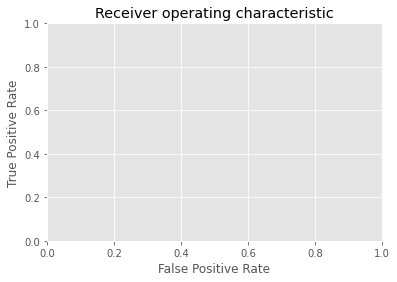

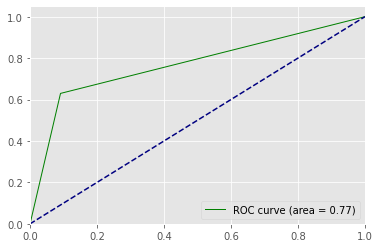

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
ax=plt.axes()
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,final_preds)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score: {}".format(roc_auc))
plt.figure()
plt.plot(fpr, tpr, color='green', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
ax.set(xlabel='False Positive Rate',ylabel='True Positive Rate',title='Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()